In [1]:
from langgraph.graph import StateGraph, END
from typing import TypedDict
import matplotlib.pyplot as plt
import random

In [2]:
class AllocationState(TypedDict):
    students: list
    atal: list
    azad: list

In [3]:
def assign_students(state: AllocationState) -> AllocationState:
    students = state["students"]
    random.shuffle(students)
    mid = len(students) // 2
    state["atal"] = students[:mid]
    state["azad"] = students[mid:]
    return state

In [4]:
def visualize_allocation(state: AllocationState) -> AllocationState:
    atal = state["atal"]
    azad = state["azad"]
    
    # Pie chart
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.pie([len(atal), len(azad)],
            labels=["Atal Hostel", "Azad Hostel"],
            autopct='%1.1f%%',
            colors=["#1f77b4", "#ff7f0e"],
            startangle=140,
            textprops={'fontsize': 12})
    plt.title("Hostel Student Distribution", fontsize=14)

    
    # Bar chart
    plt.subplot(1, 2, 2)
    atal_rooms = len(atal) // 2
    azad_rooms = len(azad) // 2
    bars = plt.bar(["Atal Rooms", "Azad Rooms"],
                   [atal_rooms, azad_rooms],
                   color=["#1f77b4", "#ff7f0e"])
    plt.title("Number of Rooms Allocated per Hostel", fontsize=14)
    plt.ylabel("Rooms (2-sharing)", fontsize=12)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                 ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    return state

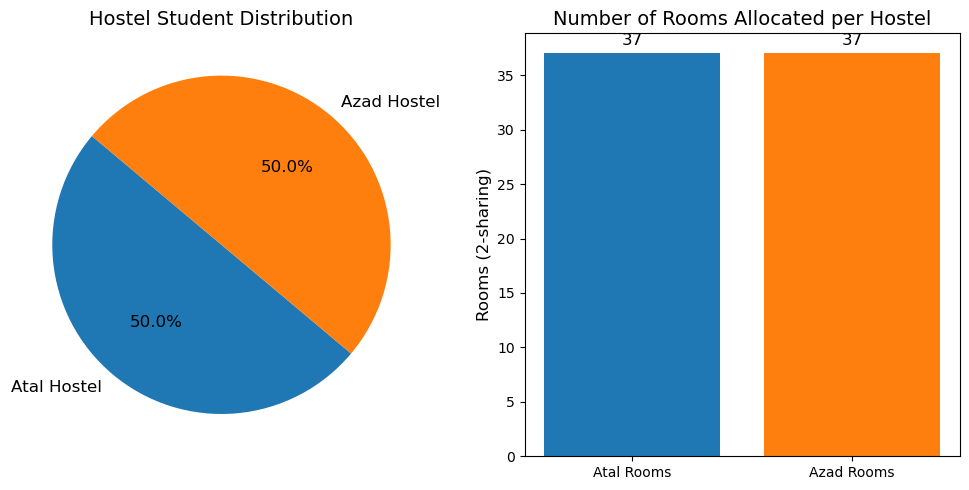

{'students': ['Student_16',
  'Student_79',
  'Student_99',
  'Student_129',
  'Student_61',
  'Student_36',
  'Student_76',
  'Student_60',
  'Student_97',
  'Student_62',
  'Student_139',
  'Student_10',
  'Student_73',
  'Student_37',
  'Student_109',
  'Student_118',
  'Student_117',
  'Student_40',
  'Student_111',
  'Student_110',
  'Student_88',
  'Student_21',
  'Student_1',
  'Student_69',
  'Student_150',
  'Student_105',
  'Student_149',
  'Student_140',
  'Student_59',
  'Student_12',
  'Student_103',
  'Student_45',
  'Student_20',
  'Student_133',
  'Student_55',
  'Student_64',
  'Student_90',
  'Student_123',
  'Student_143',
  'Student_28',
  'Student_14',
  'Student_136',
  'Student_15',
  'Student_80',
  'Student_32',
  'Student_124',
  'Student_24',
  'Student_132',
  'Student_137',
  'Student_84',
  'Student_18',
  'Student_38',
  'Student_148',
  'Student_6',
  'Student_50',
  'Student_9',
  'Student_106',
  'Student_52',
  'Student_144',
  'Student_121',
  'Stude

In [5]:
builder = StateGraph(AllocationState)
builder.add_node("assign", assign_students)
builder.add_node("visualize", visualize_allocation)

builder.set_entry_point("assign")
builder.add_edge("assign", "visualize")
builder.add_edge("visualize", END)

graph = builder.compile()

# Step 4: Input and run
students = [f"Student_{i+1}" for i in range(150)]

initial_state: AllocationState = {
    "students": students,
    "atal": [],
    "azad": []
}

graph.invoke(initial_state)